In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
data = pd.read_csv(r'Data/smart_home_device_usage_data.csv')

In [140]:
data.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


## data description

In [142]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,5403.0,2702.000000,1559.856083,1.000000,1351.500000,2702.000000,4052.500000,5403.000000
UsageHoursPerDay,5403.0,12.052992,6.714961,0.501241,6.297871,11.903768,17.791751,23.987326
EnergyConsumption,5403.0,5.054302,2.878941,0.101562,2.524968,5.007047,7.611912,9.998071
UserPreferences,5403.0,0.511753,0.499908,0.000000,0.000000,1.000000,1.000000,1.000000
MalfunctionIncidents,5403.0,2.066445,1.423291,0.000000,1.000000,2.000000,3.000000,4.000000
DeviceAgeMonths,5403.0,30.312234,16.990525,1.000000,15.000000,30.000000,45.000000,59.000000
SmartHomeEfficiency,5403.0,0.376643,0.484589,0.000000,0.000000,0.000000,1.000000,1.000000


In [143]:
num_col = [col for col in data.describe().columns]

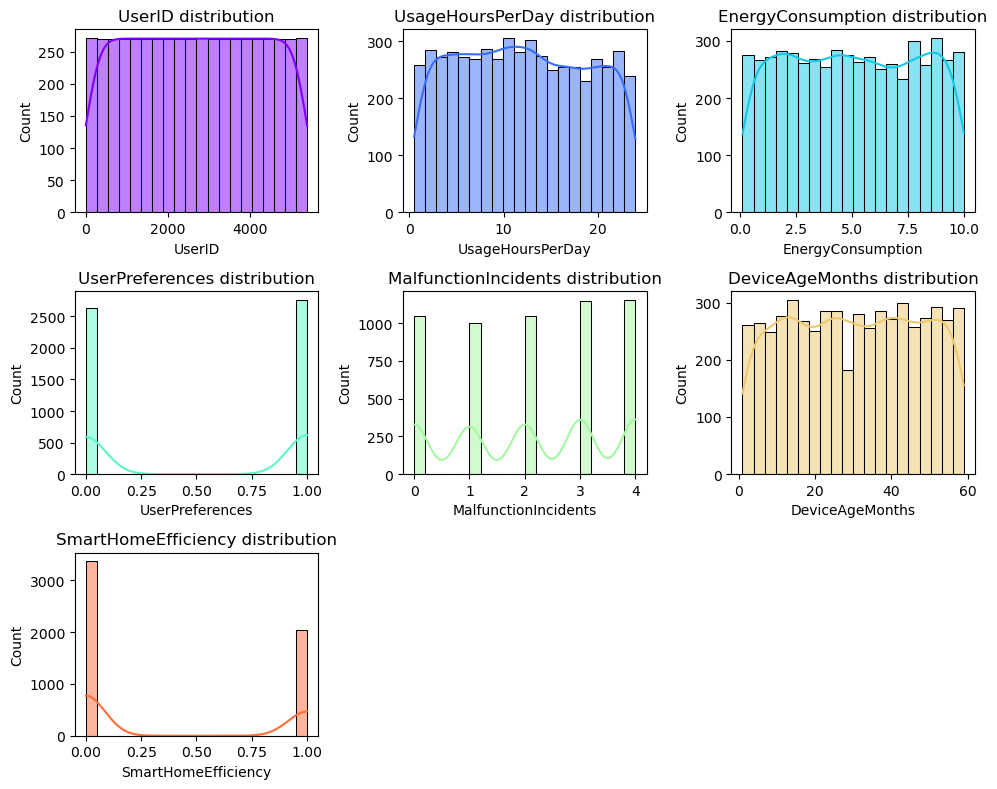

In [144]:
cmap = plt.get_cmap('rainbow')
colors = [cmap(i / len(num_col)) for i in range(len(num_col))]
plt.figure(figsize=(10,8), layout = 'tight')
for i in range(len(num_col)):
    plt.subplot(3,len(num_col)//2,i+1)
    sns.histplot(data[num_col[i]], kde= True, bins= 20, color= colors[i])
    plt.title(f"{num_col[i]} distribution")
plt.show()

- Following features are Categorical features
-- SmartHomeEfficiency, MalfunctionIncidents, UserPreferences

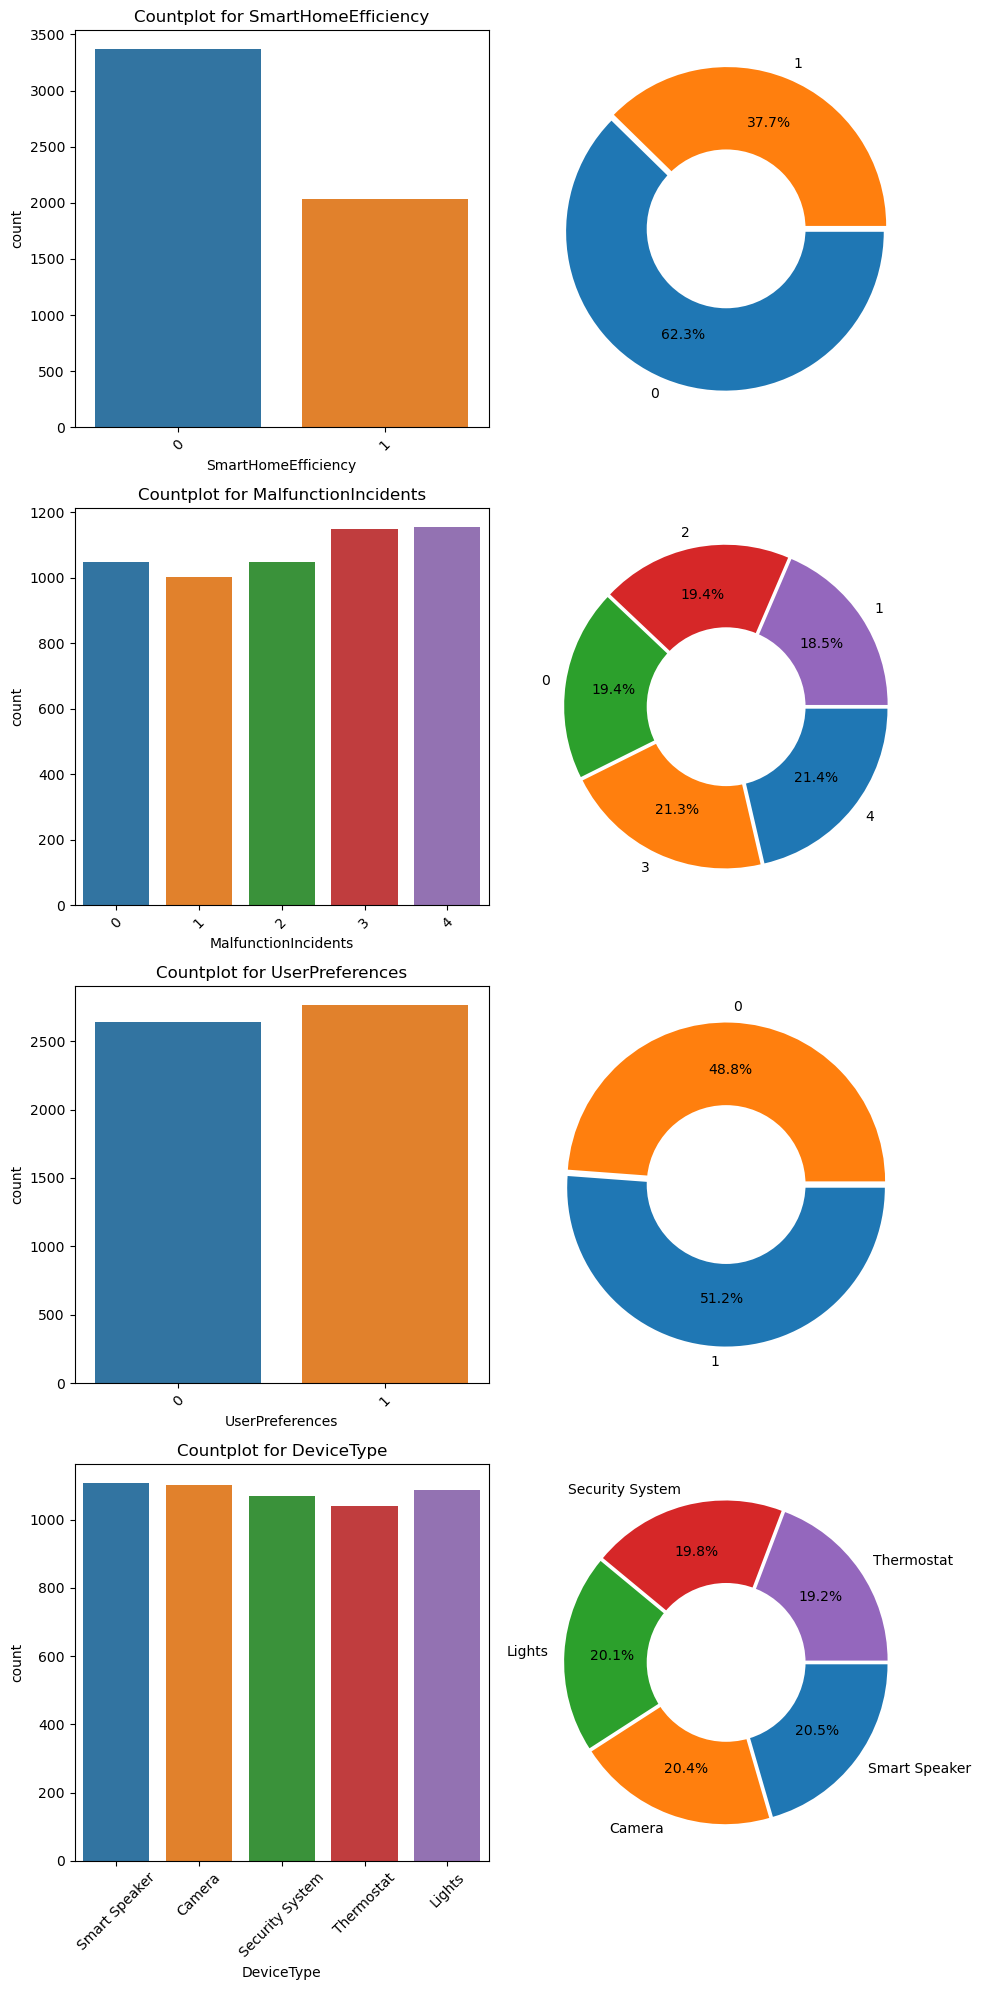

In [145]:
cat_col = ['SmartHomeEfficiency', 'MalfunctionIncidents', 'UserPreferences', 'DeviceType']
plt.figure(figsize=(10,20), layout = 'tight')
pos = 1
for i in range(len(cat_col)):
   plt.subplot(4,len(cat_col) //2, pos)
   sns.countplot(data=data, x= cat_col[i])
   plt.xticks(rotation = 45)
   plt.title(f'Countplot for {cat_col[i]}')
   pos += 1
   plt.subplot(4,len(cat_col) //2, pos)
   plt.pie(data[cat_col[i]].value_counts().values, labels= data[cat_col[i]].value_counts().index,
        counterclock= False, autopct= '%.1f%%', explode=[0.02 for x in data[cat_col[i]].value_counts().index],
        pctdistance= 0.7)
   #draw circle
   centre_circle = plt.Circle((0, 0), 0.5, fc='white')
   fig = plt.gcf()
   # Adding Circle in Pie chart
   fig.gca().add_artist(centre_circle)
   pos += 1
plt.show()

In [146]:
#dropping userID
data.drop('UserID', axis=1, inplace= True)

## Statistical analysis on the features

In [147]:
# label encoding Device
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_encoded = encoder.fit_transform(data['DeviceType'])
data['DeviceType'] = data_encoded

X = data.drop('SmartHomeEfficiency',axis = 1)
Y = data['SmartHomeEfficiency']

In [148]:
cat_cols = []
num_cols = []
for col in X.columns:
    if X[col].nunique() > 6:
        num_cols.append(col)
    else:
        cat_cols.append(col)

In [149]:
num_cols

['UsageHoursPerDay', 'EnergyConsumption', 'DeviceAgeMonths']

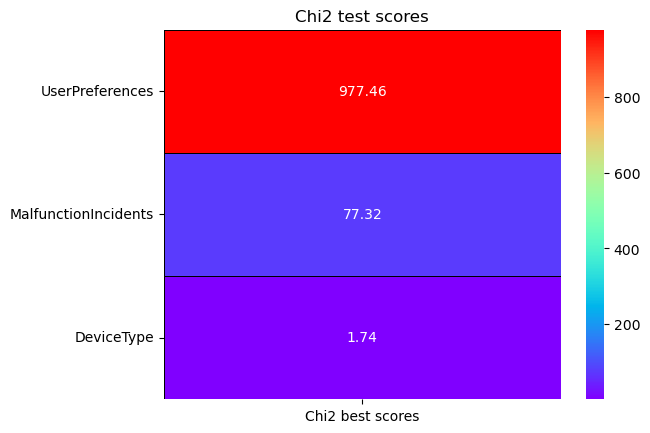

In [150]:
#checking chi2 test for categorical columns
from sklearn.feature_selection import chi2, SelectKBest
best_feature = SelectKBest(chi2, k= 'all')
best_feature.fit(X[cat_cols], Y)
feature_score = pd.DataFrame(best_feature.scores_, index=cat_cols, columns=['Chi2 best scores'])
sns.heatmap(feature_score.sort_values(ascending= False, by='Chi2 best scores'), annot= True, fmt = '.2f',
            linewidths=0.4, linecolor= 'black', cmap= 'rainbow')
plt.title('Chi2 test scores')
plt.show()

 - Device type have very limited influence on the efficiency.
 - Malfunctioning Incidents score is also low.
 - User Preference have much influence on the efficiency.

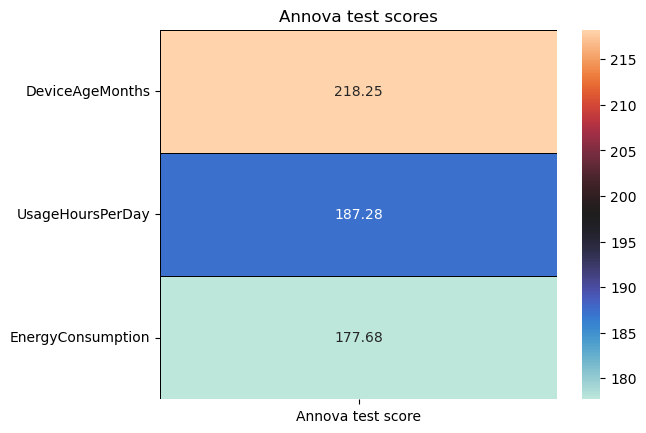

In [151]:
#annova test for the Numerical variable
from sklearn.feature_selection import f_classif
best_feature = SelectKBest(f_classif, k = 'all')
best_feature.fit(X[num_cols], Y)
scores = pd.DataFrame(best_feature.scores_, index= num_cols, columns=['Annova test score'])
sns.heatmap(scores.sort_values(ascending= False, by ='Annova test score'), annot= True, fmt = '0.2f',
            linecolor= 'black', linewidths= 0.4, cmap= 'icefire')
plt.title('Annova test scores')
plt.show()

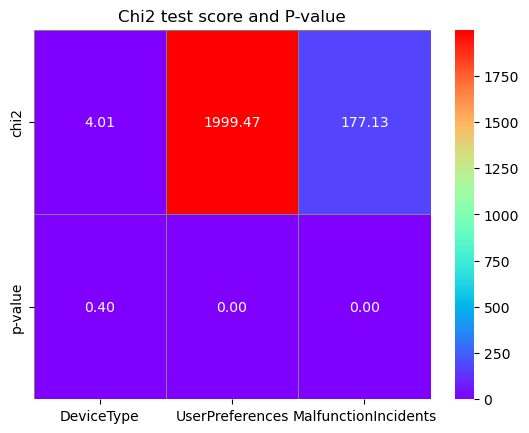

In [152]:
from scipy.stats import chi2_contingency, chi2
chi2_result = {}
for col in cat_cols:
    contingency_table = pd.crosstab(X[col], Y)
    chi2_score, p, dof, expected = chi2_contingency(contingency_table)
    chi2_result[col] = {'chi2': chi2_score, 'p-value': p}

sns.heatmap(pd.DataFrame(chi2_result), annot= True, fmt = '.2f', cmap= 'rainbow',
            linecolor= 'grey', linewidths= 0.4)
plt.title('Chi2 test score and P-value')
plt.show()

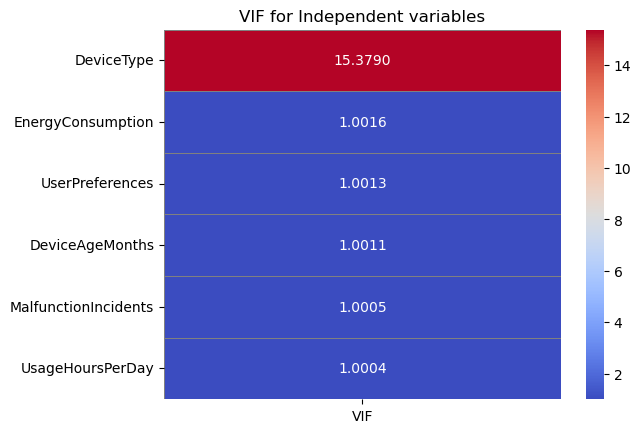

In [153]:
#VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import  variance_inflation_factor
vif_df = pd.DataFrame(index= X.columns)
X_const = sm.add_constant(X)
vif_df['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(len(X.columns))]
sns.heatmap(vif_df.sort_values(ascending= False, by= 'VIF'), annot= True, fmt = '0.4f',
            linecolor= 'grey', linewidths= 0.5, cmap= 'coolwarm')
plt.title("VIF for Independent variables")
plt.show()

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state= 42)

In [155]:
#making logit model to check the p_values and other parametrs
X_train_const = sm.add_constant(X_train)
logi =sm.Logit(y_train, X_train_const).fit()
logi.summary()

Optimization terminated successfully.
         Current function value: 0.338744
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     SmartHomeEfficiency   No. Observations:                 4052
Model:                           Logit   Df Residuals:                     4045
Method:                            MLE   Df Model:                            6
Date:                 Mon, 01 Jul 2024   Pseudo R-squ.:                  0.4887
Time:                         22:02:57   Log-Likelihood:                -1372.6
converged:                        True   LL-Null:                       -2684.5
Covariance Type:             nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8679      0.184     -4.705      0.000      -1.229      -0.506
DeviceType              -0.0384      0.034     -1.116      0.264      -0.106       0.029
UsageHoursPerDay         0.1342      0.008     16.959      0.000       0.119       0.150
EnergyConsumption       -0.3163      0.019    -16.846      0.000      -0.353      -0.279
UserPreferences          4.4085      0.139     31.721      0.000       4.136       4.681
MalfunctionIncidents    -0.4168      0.036    -11.635      0.000      -0.487      -0.347
DeviceAgeMonths         -0.0537      0.003    -16.870      0.000      -0.060      -0.047
========================================================================================
"""

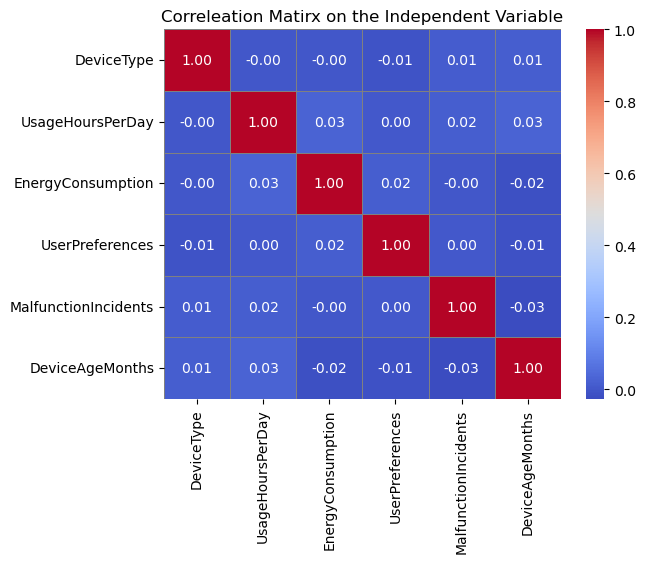

In [156]:
#correlation matrix
corr_mat = X.corr()
sns.heatmap(corr_mat, annot= True, fmt= '.2f', linecolor= 'grey', linewidths= 0.5, cmap= 'coolwarm')
plt.title('Correleation Matirx on the Independent Variable')
plt.show()

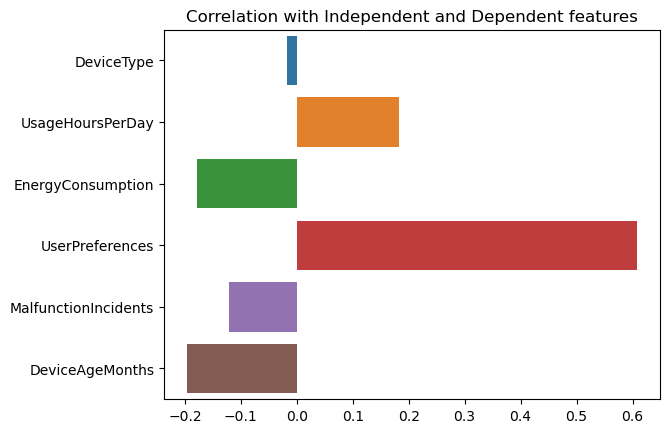

In [157]:
corr_mat1 = X.corrwith(Y)
sns.barplot(x= corr_mat1.values, y= corr_mat1.index)
plt.title("Correlation with Independent and Dependent features")
plt.show()

- All the above test shows that DeviceType has no significane on the output. We will remove the same